# Exploratory Data Anaylsis - 2018 Census Data

In [1]:
# import libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

### Note

The raw data has already been filtered to include only the columns that map to the original 1994 data, and to only include those over the age of 16, with a non-zero hours-per-week worked, and non-zero income.

- AGEP: Age
- COW: Class of Worker
- SCHL: Educational attainment (NOT years of schooling, number corresponds to a level)
- MAR: marital status (1.Married, 2.Widowed,3.Divorced, 4.Separated, 5.Never married)
- OCCP: occupation (based on 2018 OCC codes)
- RELP: relationship (whether person filling out information is actual reference person or someone else)
- RAC1P: race
- SEX: 1 male, 2 female (only 2 options)
- INTP: interest, dividends, and net rental income past 12 months (analagous to capital gains, not present in 2018 census)
- WKHP: Usual hours worked per week past 12 months
- POBP: place of birth (pertains to numerical code including states and countries)
- PINCP: Total person's income


See data dictionary: https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2018.pdf

In [13]:
# Importing the Data Set
df_2018 = pd.read_csv("2018_mapped.csv")
df_2018.head()

,AGEP,COW,SCHL,MAR,OCCP,RELP,RAC1P,SEX,INTP,WKHP,POBP,PINCP
0,33,2.0,24.0,1,1760.0,0,6,1,0.0,40.0,210,55000.0
1,51,1.0,21.0,1,4700.0,1,1,2,0.0,15.0,39,50000.0
2,52,1.0,19.0,3,7750.0,17,1,2,0.0,46.0,19,3600.0
3,24,1.0,21.0,1,3255.0,1,1,2,0.0,40.0,8,60000.0
4,19,1.0,16.0,5,4020.0,2,1,1,0.0,6.0,18,3700.0


### Encoding the data to make it easier to read

The original dataset replaced the numerical categorical values with actual word categories. 

In order to be as similar to the original as possible, we will do the same in the initial EDA.

First, we replace column names with words instead of codes.

In [15]:
# make a copy of the dataframe that we will modify
df_2018_eda = df_2018.copy()

# replace column names
df_2018_eda = df_2018_eda.rename(columns = 
                                 {'AGEP': 'Age', 
                                  'COW': 'class-worker',
                                  'SCHL': 'education',
                                  'MAR': 'marital-status',
                                  'OCCP': 'occupation',
                                  'RELP': 'relationship',
                                  'RAC1P': 'race',
                                  'SEX': 'sex',
                                  'INTP': 'extra-income',
                                  'WKHP': 'hours-per-week',
                                  'POBP': 'place-of-birth',
                                  'PINCP': 'income'}, inplace = False)

df_2018_eda.head()

,Age,class-worker,education,marital-status,occupation,relationship,race,sex,extra-income,hours-per-week,place-of-birth,income
0,33,2.0,24.0,1,1760.0,0,6,1,0.0,40.0,210,55000.0
1,51,1.0,21.0,1,4700.0,1,1,2,0.0,15.0,39,50000.0
2,52,1.0,19.0,3,7750.0,17,1,2,0.0,46.0,19,3600.0
3,24,1.0,21.0,1,3255.0,1,1,2,0.0,40.0,8,60000.0
4,19,1.0,16.0,5,4020.0,2,1,1,0.0,6.0,18,3700.0


## Changing values from number-category to string-category 

For now, this is the same as the original dataset, but the values have changed between 1994 and 2018. The class of worker categories are slightly different - including nonprofit employment, for example. 

Education categories include all grades separated out, along with grade12-nograd, and some-college split out between less than 1 year and more than 1 year. Associates degrees are not split by academic or vocational anymore. It's unknown if these differences were present in the data or changed by the creators of the dataset.


#### Occupation and place of birth are both huge lists and will be tackled later on.

In [18]:
# replace numerical categories with string categories

# class-worker
df_2018_eda["class-worker"].replace({1.0: "Private-prof", 2.0: "Private-nonprof",
                                    3.0: "Local-gov", 4.0: "State-gov",
                                    5.0: "Fed-gov", 6.0: "Self-emp-not-inc",
                                    7.0: "Self-emp-inc", 8.0: "Without-pay",
                                    9.0: "Never-worked"}, inplace=True)

# education
df_2018_eda["education"].replace({1.0: "no-school", 2.0: "preschool",
                                    3.0: "kindergarten", 4.0: "grade1",
                                    5.0: "grade2", 6.0: "grade3",
                                    7.0: "grade4", 8.0: "grade5",
                                    9.0: "grade6", 10.0: "grade7",
                                    11.0: "grade8", 12.0: "grade9",
                                    13.0: "grade10", 14.0: "grade11",
                                    15.0: "grade12-nograd", 16.0: "HSgrad",
                                    17.0: "GED", 18.0: "some-college-less1",
                                    19.0: "some-college-great1", 20.0: "associate",
                                    21.0: "bachelor", 22.0: "master",
                                    23.0: "prof-school", 24.0: "doctorate"}, inplace=True)

# marital status
df_2018_eda["marital-status"].replace({1.0: "Married", 2.0: "Widowed",
                                    3.0: "Divorced", 4.0: "Separated",
                                    5.0: "Never-married"}, inplace=True)

# occupation - WAIT 

# relationship
df_2018_eda["relationship"].replace({0: "ref", 1: "spouse", 
                                     2: "child", 3: "adopted-child",
                                     4: "step-child", 5: "sibling", 
                                     6: "parent", 7: "grandchild", 
                                     8: "parent-inlaw", 9: "child-inlaw",
                                    10: "other-relative", 11: "boarder", 
                                    12: "house-room-mate", 13: "unmarried-partner", 
                                    14: "foster-child", 15: "non-relative-other",
                                    16: "institutional-group", 17: "noninstitutional-group"}, inplace=True)

# race
df_2018_eda["race"].replace({1: "white-alone", 2: "black-aa-alone", 
                                     3: "american-indian-alone", 4: "alaska-native-alone",
                                     5: "indian-or-ak-native", 6: "asian-alone", 
                                     7: "native-hi-pac-isl", 8: "other-race-alone", 
                                     9: "two-or-more-races"}, inplace=True)


# sex
df_2018_eda["sex"].replace({1: "male", 2: "female"}, inplace=True)

# place of birth - WAIT

df_2018_eda.head()

,Age,class-worker,education,marital-status,occupation,relationship,race,sex,extra-income,hours-per-week,place-of-birth,income
0,33,Private-nonprof,doctorate,Married,1760.0,ref,asian-alone,male,0.0,40.0,210,55000.0
1,51,Private-prof,bachelor,Married,4700.0,spouse,white-alone,female,0.0,15.0,39,50000.0
2,52,Private-prof,some-college-great1,Divorced,7750.0,noninstitutional-group,white-alone,female,0.0,46.0,19,3600.0
3,24,Private-prof,bachelor,Married,3255.0,spouse,white-alone,female,0.0,40.0,8,60000.0
4,19,Private-prof,HSgrad,Never-married,4020.0,child,white-alone,male,0.0,6.0,18,3700.0


## EDA with categorical variables like the original dataset

In [19]:
df_2018_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749970 entries, 0 to 749969
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             749970 non-null  int64  
 1   class-worker    749970 non-null  object 
 2   education       749970 non-null  object 
 3   marital-status  749970 non-null  object 
 4   occupation      749970 non-null  float64
 5   relationship    749970 non-null  object 
 6   race            749970 non-null  object 
 7   sex             749970 non-null  object 
 8   extra-income    749970 non-null  float64
 9   hours-per-week  749970 non-null  float64
 10  place-of-birth  749970 non-null  int64  
 11  income          749970 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 68.7+ MB


In [20]:
print(df_2018_eda.shape)

(749970, 12)


In [31]:
# checking null values
df_2018_eda.isnull().sum(axis = 0)

Age               0
class-worker      0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
extra-income      0
hours-per-week    0
place-of-birth    0
income            0
dtype: int64

There don't seem to be any missing values.

In [21]:
df_2018_eda.columns

Index(['Age', 'class-worker', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'extra-income', 'hours-per-week',
       'place-of-birth', 'income'],
      dtype='object')

In [23]:
# exploring income - target variable

df_2018_eda['income'].value_counts()

30000.0      20901
40000.0      19620
50000.0      19212
20000.0      16709
60000.0      16170
             ...  
944800.0         1
1040000.0        1
195480.0         1
25940.0          1
524300.0         1
Name: income, Length: 13482, dtype: int64

Looks like we have a mix of whole number variables - people must have been given the option to check a box, or to enter in the exact amount.

In [24]:
df_2018_eda['income'].describe()

count    7.499700e+05
mean     5.771524e+04
std      7.457981e+04
min      1.040000e+02
25%      2.000000e+04
50%      3.980000e+04
75%      7.000000e+04
max      1.353400e+06
Name: income, dtype: float64

The maximum income is 1353400.0
The minimum income is 104.0


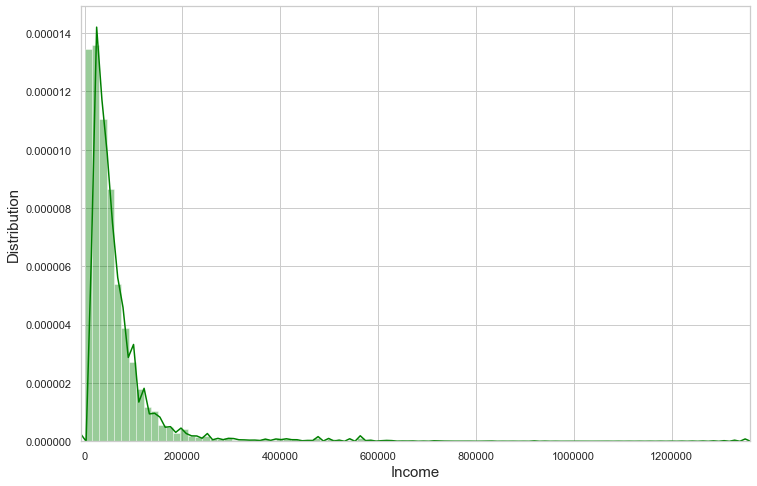

In [46]:
# distribution of income  

plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df_2018_eda['income'], bins = 90, color = 'green')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Income", fontsize = 15)
plt.margins(x = 0)

print ("The maximum income is", df_2018_eda['income'].max())
print ("The minimum income is", df_2018_eda['income'].min())

In [27]:
# age

df_2018_eda['Age'].describe()

count    749970.000000
mean         43.407239
std          15.264524
min          17.000000
25%          30.000000
50%          43.000000
75%          56.000000
max          96.000000
Name: Age, dtype: float64

The maximum age is 96
The minimum age is 17


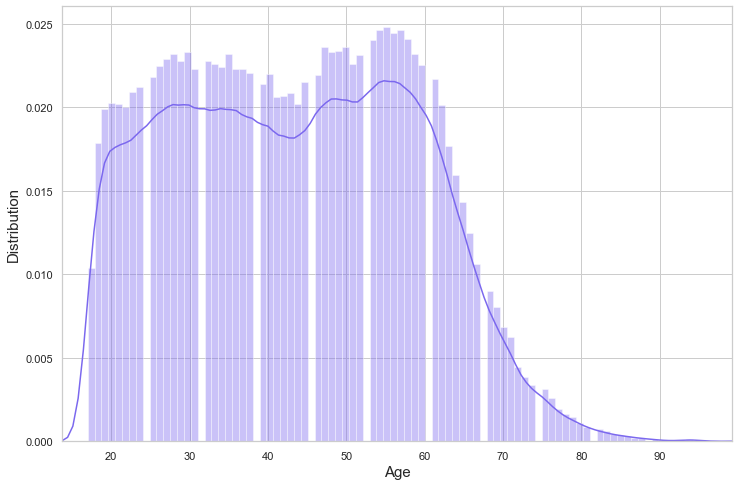

In [39]:
# distribution of Age 

plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df_2018_eda['Age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df_2018_eda['Age'].max())
print ("The minimum age is", df_2018_eda['Age'].min())

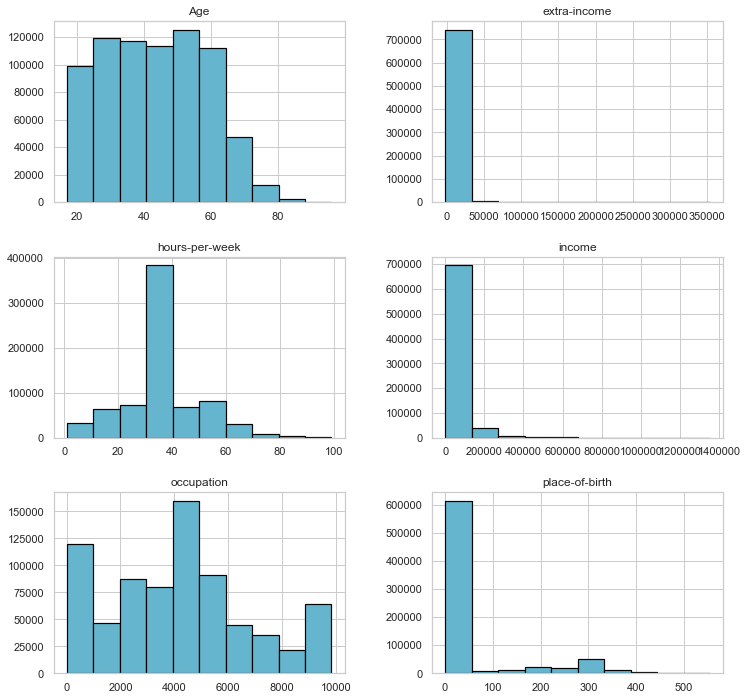

In [40]:
# Distribution of Different numerical features of the Dataset
distribution = df_2018_eda.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

# occupation shows as numerical - it should be categorical

In [41]:
# hours per week - mean vs median - are there outliers?

print (df_2018_eda['hours-per-week'].median())
print (df_2018_eda['hours-per-week'].mean())

40.0
38.28766083976692


In [29]:
# class of worker

df_2018_eda['class-worker'].value_counts()

Private-prof        493485
Private-nonprof      63124
Local-gov            52710
Self-emp-not-inc     50243
State-gov            34364
Self-emp-inc         31350
Fed-gov              22392
Without-pay           2302
Name: class-worker, dtype: int64

In [32]:
# education

df_2018_eda['education'].value_counts()

bachelor               167062
HSgrad                 149160
some-college-great1    117106
master                  72797
associate               69188
some-college-less1      54784
GED                     24508
prof-school             19527
grade11                 14912
doctorate               13055
grade12-nograd          12980
grade10                  8167
no-school                7633
grade9                   5949
grade6                   4773
grade8                   3800
grade7                   1231
grade5                    936
grade3                    894
grade4                    625
grade2                    401
grade1                    210
preschool                 145
kindergarten              127
Name: education, dtype: int64

In [33]:
# relationship - how many people are filling it out for themselves?

df_2018_eda['relationship'].value_counts()

ref                       371114
spouse                    181301
child                      82040
unmarried-partner          26579
noninstitutional-group     19381
house-room-mate            15673
sibling                     8405
non-relative-other          7979
other-relative              7144
grandchild                  5412
institutional-group         4996
step-child                  4529
parent                      4306
child-inlaw                 4261
boarder                     3889
adopted-child               2136
parent-inlaw                 781
foster-child                  44
Name: relationship, dtype: int64

In [34]:
# race
df_2018_eda['race'].value_counts()

white-alone              568811
black-aa-alone            68678
asian-alone               51215
other-race-alone          33195
two-or-more-races         20373
american-indian-alone      4343
native-hi-pac-isl          1685
indian-or-ak-native         940
alaska-native-alone         730
Name: race, dtype: int64

In [35]:
# extra income - is this worth including?
df_2018_eda['extra-income'].describe()

count    749970.000000
mean       1841.952491
std       17154.540204
min       -2400.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      354000.000000
Name: extra-income, dtype: float64

In [36]:
df_2018_eda['extra-income'].value_counts()

0.0        664042
1000.0       3696
100.0        3243
10000.0      3012
5000.0       2881
            ...  
45900.0         1
46100.0         1
46600.0         1
47900.0         1
47200.0         1
Name: extra-income, Length: 696, dtype: int64

looks like the bulk of people in the dataset do not have extra income reported on the census

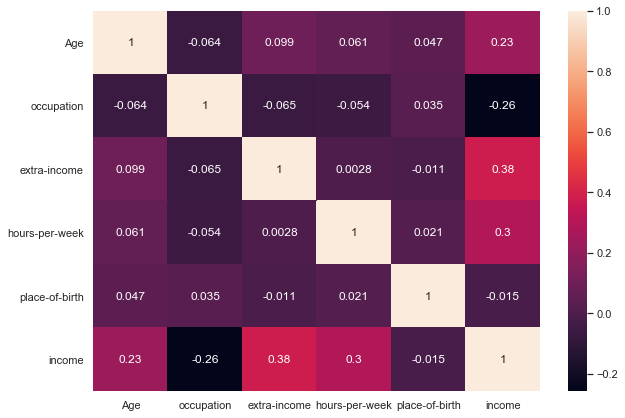

In [42]:
# heatmap shows the Correlation between the different variables
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df_2018_eda.corr(), annot = True);

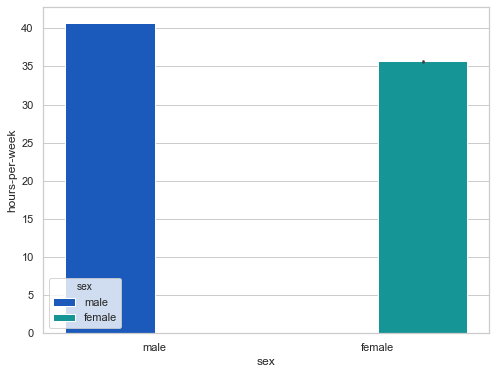

In [44]:
# difference of hours per week between male and female 
sns.set(style = 'whitegrid', rc={'figure.figsize':(8,6)})
sns.barplot(x = df_2018_eda['sex'], y = df_2018_eda['hours-per-week'], data = df_2018_eda,
            estimator = mean, hue = 'sex', palette = 'winter');

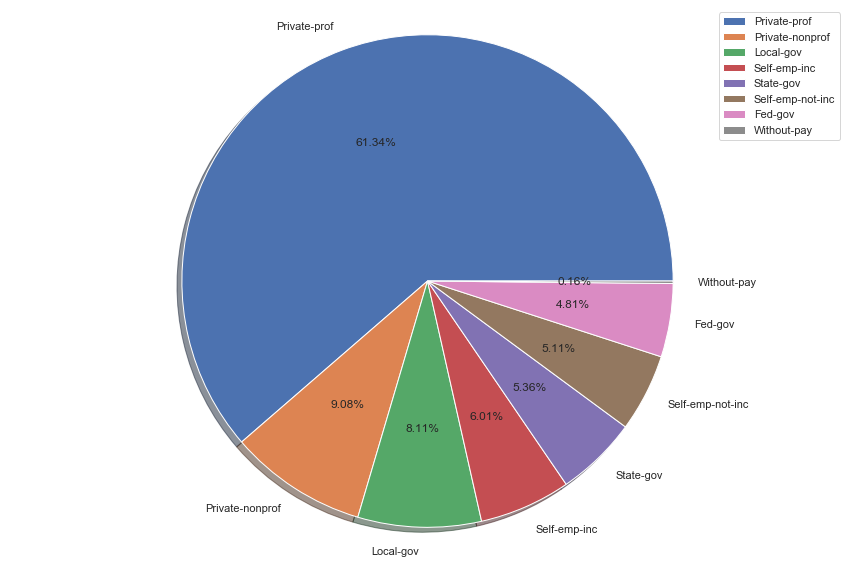

In [47]:
# Creating Series for the class-of-worker whose income is higher than 50K 
df_ = df_2018_eda.loc[df_2018_eda['income'] > 50000,['class-worker']]
workclass_types = df_['class-worker'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)

# pie chart - Percentage of different class of worker who earns more than 50K
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

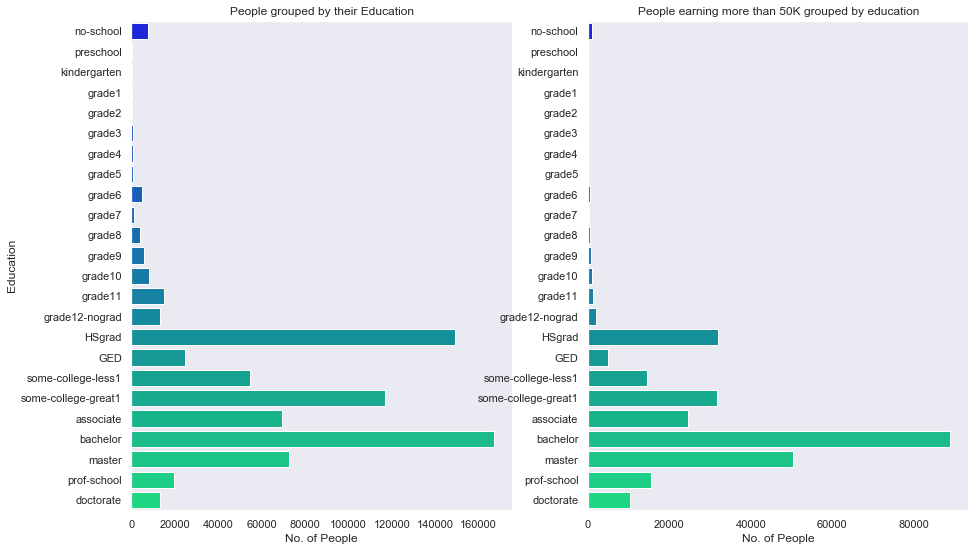

In [49]:
# Grouping people by their education
education_size = df_2018_eda.groupby('education').size()

# Grouping people who earns more than 50K by their education
more_income = df_2018_eda.loc[df_2018_eda['income']> 50000, ['education']].groupby('education').size()

sns.set(style = 'dark')
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1,2)

# Setting axes Labels and Titles
ax[0].set_ylabel("Education")
ax[0].set_xlabel("No. of People")
ax[1].set_xlabel("No. of People")
ax[0].title.set_text("People grouped by their Education")
ax[1].title.set_text("People earning more than 50K grouped by education")

# Barplot for the people grouped by their education
sns_ed_1 = sns.barplot(x = list(education_size), y = list(education_size.index), palette = 'winter',
                       order = ['no-school', 'preschool', 'kindergarten', 
                               'grade1', 'grade2', 'grade3', 'grade4', 'grade5', 
                               'grade6', 'grade7', 'grade8', 'grade9', 'grade10',
                               'grade11', 'grade12-nograd','HSgrad', 'GED',
                               'some-college-less1', 'some-college-great1', 'associate',
                               'bachelor', 'master', 'prof-school', 'doctorate'], ax = ax[0])

# Barplot for the people who earns more than 50K grouped by their education
sns_ed_2 = sns.barplot(x = list(more_income), y = list(more_income.index), palette = 'winter',
                       order = ['no-school', 'preschool', 'kindergarten', 
                               'grade1', 'grade2', 'grade3', 'grade4', 'grade5', 
                               'grade6', 'grade7', 'grade8', 'grade9', 'grade10',
                               'grade11', 'grade12-nograd','HSgrad', 'GED',
                               'some-college-less1', 'some-college-great1', 'associate',
                               'bachelor', 'master', 'prof-school', 'doctorate'], ax = ax[1])

## Grouping by race and income

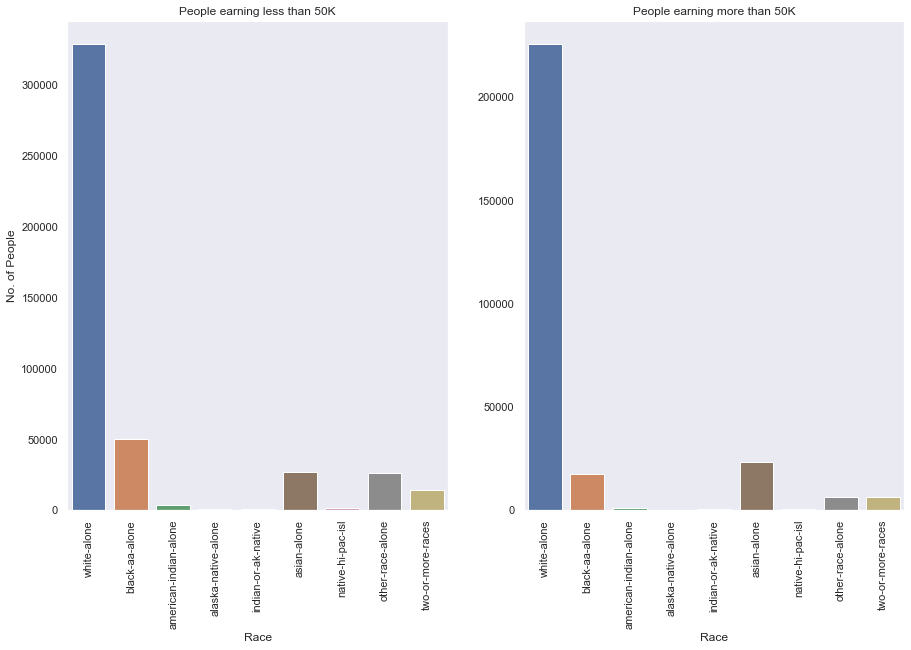

In [50]:
# axes Labels and Titles 
fig, ax = plt.subplots(1,2)
ax[0].set_xlabel('Race')
ax[1].set_xlabel('Race')
ax[0].set_ylabel('No. of People')
ax[0].title.set_text("People earning less than 50K")
ax[1].title.set_text("People earning more than 50K")

# group by race and income
race_less = df_2018_eda.loc[df_2018_eda['income']< 50000].groupby('race').size()
race_more = df_2018_eda.loc[df_2018_eda['income']> 50000].groupby('race').size()

# This barplot shows the no.of people earning more or less than 50K according to their races
sns_race_1 = sns.barplot(x = list(race_less.index), y = list(race_less), ax = ax[0],
                         order = ['white-alone', 'black-aa-alone',
                                  'american-indian-alone', 'alaska-native-alone','indian-or-ak-native',
                                 'asian-alone', 'native-hi-pac-isl', 'other-race-alone',
                                 'two-or-more-races'])
sns_race_2 = sns.barplot(x = list(race_more.index), y = list(race_more), ax = ax[1],
                        order = ['white-alone', 'black-aa-alone',
                                  'american-indian-alone', 'alaska-native-alone','indian-or-ak-native',
                                 'asian-alone', 'native-hi-pac-isl', 'other-race-alone',
                                 'two-or-more-races'])

plt.setp(sns_race_1.get_xticklabels(), rotation = 90);
plt.setp(sns_race_2.get_xticklabels(), rotation = 90);